In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import csv
import pickle 
import copy 

import numpy as np
import random
import time

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


import sys
sys.path.insert(0, "../utils/")
from utils import predictionPlots, extractData, writeResult, R2

import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredError
from keras.utils.generic_utils import get_custom_objects

from keras import backend as K

## Input options

In [3]:
features_names  = ['m1', 'm2', 's1x', 's1y', 's1z', 's2x', 's2y', 's2z', 'theta', 'q', 'Mc'];
regr_data_dir   = '../NewRealistic/'
write_output    = False
out_data_dir    = '../NNtf_results/'
versions        = ['0'] # can be a subset of ['0', '1', '2']
clabels         = ['0'] # can be a subset of ['0', '1']

# sample size
Ntrain          = 20000
Ntest           = 15000

# training options
epochs           = 100
validation_split = 0.2
batch_size       = 64
verbose_training = 1
hidden_units     = 150
learning_rate    = 0.0001

# hyperparameters, one for each dataset ( i.e. len(versions)*len(clables) ). IMPROVE ME 

## Check on input and dictionary-initialization

In [4]:
Nfeatures  = len(features_names)

# check that we are not exceeding the size of the datasets
Ntrain_max = 20000;
Ntest_max  = 15000;
Ntrain     = min(Ntrain, Ntrain_max)
Ntest      = min(Ntest,  Ntest_max )

# define dictionary for each version considered
Nv       = len(versions)
Nc       = len(clabels)
Nsets    = Nv*Nc

if Nv*Nc!=Nsets:
    print('+++ Wrong input! +++')

datasets = {}
keys     = []
for i in range(0,Nv):
    version = versions[i]
    for j in range(0,Nc):
        clabel = clabels[j]
        key = 'v'+version+'c'+clabel
        keys.append(key)
        datasets[key]         = lambda:0
        datasets[key].clabel  = clabel
        datasets[key].version = version
        datasets[key].Ntrain  = Ntrain
        datasets[key].Ntest   = Ntest

In [5]:
def custom_activation(x):
    #return K.sigmoid(x)
    return x

def buildModelUsingSequential(hidden_units, batch_size, Nfeatures):
    #get_custom_objects().update({'custom_activation': Activation(custom_activation)})
    model = Sequential([
    Dense(hidden_units, kernel_initializer='normal', activation='relu'  ),
    #Dense(hidden_units, kernel_initializer='normal', activation='relu'  ),
    Dense(Nfeatures,    kernel_initializer='normal', activation=custom_activation)
    ])
    model.build((batch_size, Nfeatures))
    return model

mse = MeanSquaredError()

## Loop on versions

********************************************************************************
Key: v0c0
********************************************************************************
../NewRealistic/v0c0train_x.csv loaded
../NewRealistic/v0c0train_y.csv loaded
../NewRealistic/v0c0test_x.csv loaded
../NewRealistic/v0c0test_y.csv loaded
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (64, 150)                 1800      
                                                                 
 dense_1 (Dense)             (64, 11)                  1661      
                                                                 
Total params: 3,461
Trainable params: 3,461
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.8963 - mean_squared_error: 0.8963 - accuracy: 0

Epoch 36/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0923 - mean_squared_error: 0.0923 - accuracy: 0.8465 - val_loss: 0.1010 - val_mean_squared_error: 0.1013 - val_accuracy: 0.8650
Epoch 37/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0913 - mean_squared_error: 0.0913 - accuracy: 0.8470 - val_loss: 0.1007 - val_mean_squared_error: 0.1009 - val_accuracy: 0.8660
Epoch 38/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0903 - mean_squared_error: 0.0903 - accuracy: 0.8488 - val_loss: 0.0999 - val_mean_squared_error: 0.1002 - val_accuracy: 0.8665
Epoch 39/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0893 - mean_squared_error: 0.0893 - accuracy: 0.8501 - val_loss: 0.0985 - val_mean_squared_error: 0.0988 - val_accuracy: 0.8673
Epoch 40/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0884 - mean_squared_error: 0.0884 - accuracy: 0.8508 - val_loss: 0.0989 - val_mean_squared_error: 

Epoch 76/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0707 - mean_squared_error: 0.0707 - accuracy: 0.8692 - val_loss: 0.0862 - val_mean_squared_error: 0.0865 - val_accuracy: 0.8805
Epoch 77/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0705 - mean_squared_error: 0.0705 - accuracy: 0.8689 - val_loss: 0.0843 - val_mean_squared_error: 0.0846 - val_accuracy: 0.8808
Epoch 78/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0702 - mean_squared_error: 0.0702 - accuracy: 0.8699 - val_loss: 0.0845 - val_mean_squared_error: 0.0848 - val_accuracy: 0.8805
Epoch 79/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0699 - mean_squared_error: 0.0699 - accuracy: 0.8701 - val_loss: 0.0842 - val_mean_squared_error: 0.0845 - val_accuracy: 0.8800
Epoch 80/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0696 - mean_squared_error: 0.0696 - accuracy: 0.8702 - val_loss: 0.0845 - val_mean_squared_error: 

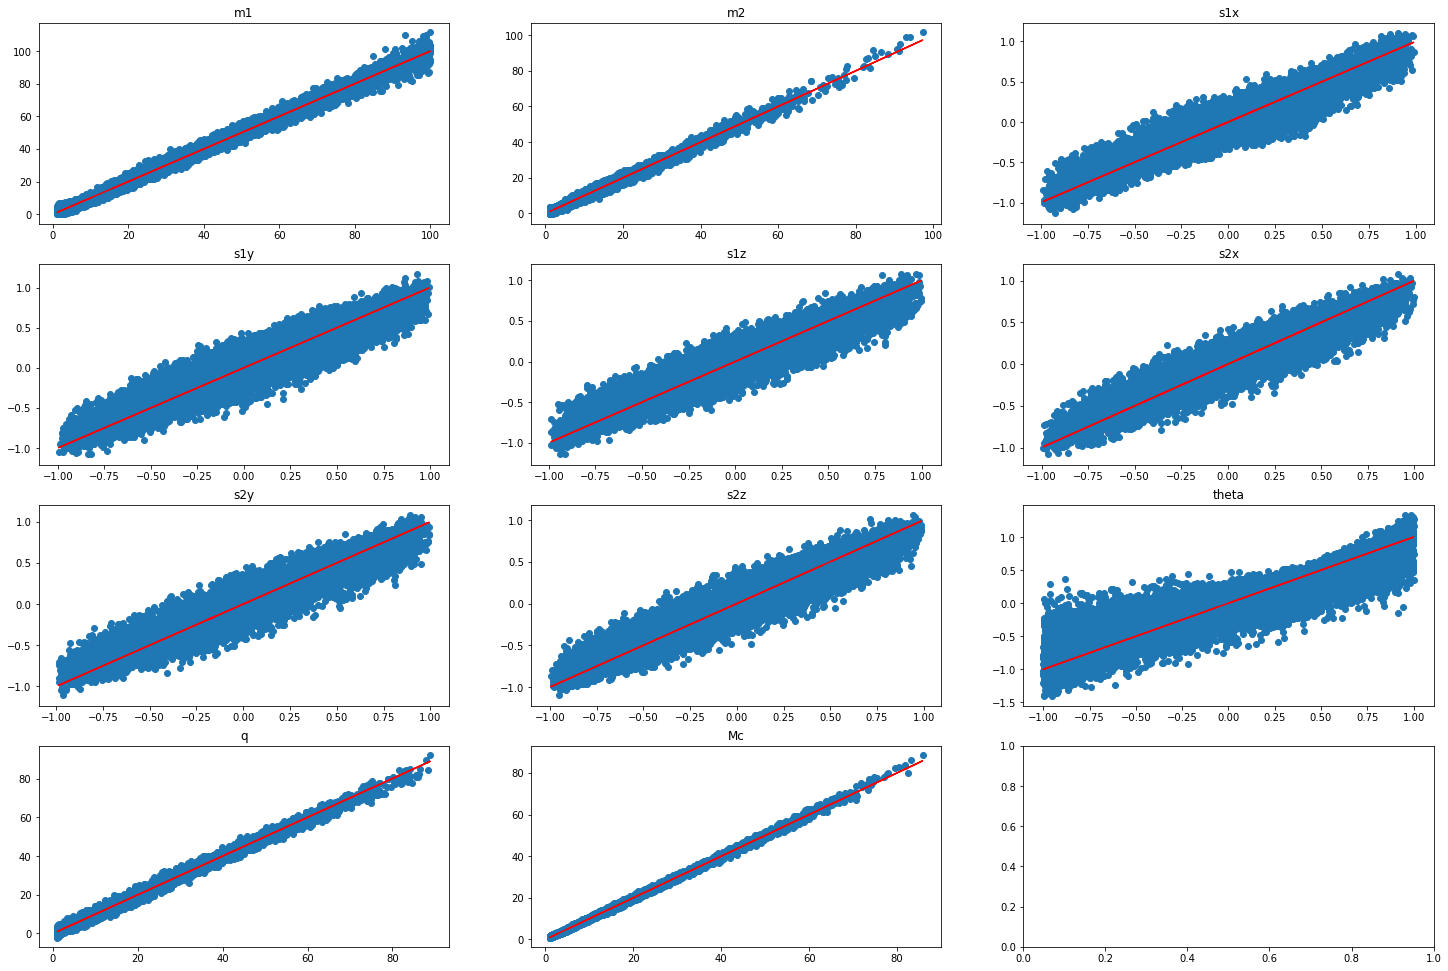

In [6]:
dashes = '*'*80

for key in keys:
    print(dashes, '\nKey: ', key, '\n', dashes, sep='')
        
    # Load all the data for the specific version
    xtrain_tot = extractData(regr_data_dir+key+'train_x.csv', verbose=True)
    ytrain_tot = extractData(regr_data_dir+key+'train_y.csv', verbose=True)
    xtest_tot  = extractData(regr_data_dir+key+'test_x.csv' , verbose=True)
    ytest_tot  = extractData(regr_data_dir+key+'test_y.csv' , verbose=True)
    
    # select a subset according to the input
    xtrain_notnormalized = xtrain_tot[0:Ntrain,:]
    ytrain_notnormalized = ytrain_tot[0:Ntrain,:]
    xtest_notnormalized  = xtest_tot[0:Ntest,:]
    ytest_notnormalized  = ytest_tot[0:Ntest,:]
    
    # rescale
    scaler_x = StandardScaler().fit(xtrain_notnormalized)
    scaler_y = StandardScaler().fit(ytrain_notnormalized)
    xtrain   = scaler_x.transform(xtrain_notnormalized)
    ytrain   = scaler_y.transform(ytrain_notnormalized)
    xtest    = scaler_x.transform(xtest_notnormalized)
    ytest    = scaler_y.transform(ytest_notnormalized)
    
    #for i in range(0,Nfeatures):
    #    plt.figure
    #    plt.plot(xtest[:,i])
    #    plt.plot(ytest[:,i])
    #    plt.show()
    
    # convert to pandas 
    xtrain_pandas = pd.DataFrame(data=xtrain,
                      index=pd.RangeIndex(range(0, Ntrain)),
                      columns=pd.RangeIndex(range(0, Nfeatures)))
    ytrain_pandas = pd.DataFrame(data=ytrain,
                      index=pd.RangeIndex(range(0, Ntrain)),
                      columns=pd.RangeIndex(range(0, Nfeatures)))
    
    xtest_pandas = pd.DataFrame(data=xtest,
                      index=pd.RangeIndex(range(0, Ntest)),
                      columns=pd.RangeIndex(range(0, Nfeatures)))
    ytest_pandas = pd.DataFrame(data=ytest,
                      index=pd.RangeIndex(range(0, Ntest)),
                      columns=pd.RangeIndex(range(0, Nfeatures)))

    # build the model
    model = buildModelUsingSequential(hidden_units, batch_size, Nfeatures)

    # compile 
    model.compile(
        loss=mse, 
        optimizer=Adam(learning_rate=learning_rate), 
        metrics=[mse, 'accuracy']
    )
    
    model.summary()
    
    # train the model
    t0 = time.perf_counter()
    history = model.fit(
        xtrain_pandas.values, 
        ytrain_pandas.values, 
        epochs           = epochs, 
        batch_size       = batch_size,
        validation_split = validation_split,
        verbose          = verbose_training
    )
    train_time = time.perf_counter()-t0
    
    # predict
    ypredicted = model.predict(xtest_pandas)
    
    R2_vec = np.zeros((Nfeatures,))
    for i in range(0,Nfeatures):
         R2_vec[i] = R2(ytest[:,i], ypredicted[:,i])
    
    # print some information
    metrics_dict    = {};
    metrics_results = model.evaluate(xtest, ytest, verbose=0)
    metrics_dict["loss"]   = metrics_results[0]
    metrics_dict["mse"]    = metrics_results[1]
    metrics_dict["acc"]    = metrics_results[2]
    metrics_dict["R2"]     = R2_vec
    metrics_dict["R2mean"] = np.mean(R2_vec)
    
    print('\nFinal loss     :', metrics_dict["loss"])
    print('Final mse      :', metrics_dict["mse"])
    print('Final accuracy :', metrics_dict["acc"])
    print('Final R2 mean  :', metrics_dict["R2mean"])
    for i in range(0,Nfeatures):
        print('R2[{:2d}]         : {:.5f}'.format(i,metrics_dict["R2"][i]))
        
    # update dictionary adding data (both normalized and not), model and score
    datasets[key].train_time = train_time
    datasets[key].model      = model
    datasets[key].history    = history
    datasets[key].predicted  = scaler_y.inverse_transform(ypredicted)
    datasets[key].metrics    = metrics_dict
    
    # plot
    predictionPlots(scaler_y.inverse_transform(ytest), 
                scaler_y.inverse_transform(ypredicted), 
                features_names)
    
    del model

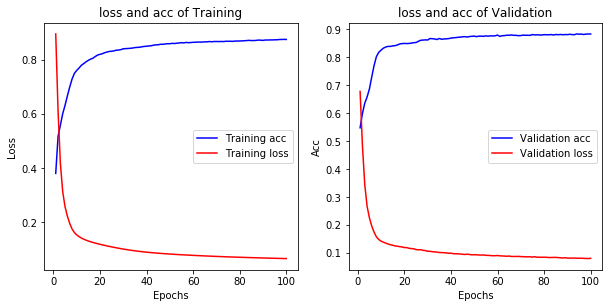

In [7]:
# plot history 
history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs_plot=range(1,epochs+1)    
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs_plot,acc,'b',label='Training acc')
ax1.plot(epochs_plot,loss,'r',label='Training loss')
ax1.set_title('loss and acc of Training')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2=plt.subplot(222)
ax2.plot(epochs_plot,val_acc,'b',label='Validation acc')
ax2.plot(epochs_plot,val_loss,'r',label='Validation loss')
ax2.set_title('loss and acc of Validation')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Acc')
ax2.legend()

## Produce CSV files and save models

In [8]:
if write_output:
    for key in keys:
        # save csv
        filename = out_data_dir+'NNtf_'+key+'.csv'
        writeResult(filename, datasets[key].predicted, verbose=True)
        
        # save model
        #dict_name = out_data_dir+'NNtf_'+key+'.dict'
        #pickle.dump(datasets[key].model, open(dict_name, 'wb'))
        #print(dict_name, 'saved') 
        
        # example for loading models
        #dict_name    = out_data_dir+'NNtf_'+key+'.dict'
        #print('Loading', dict_name, '...')
        #loaded_model = pickle.load(open(dict_name, 'rb'))